<a href="https://colab.research.google.com/github/adgadiwan09/Week-1-Machine_Learning/blob/master/Cancer_project_by_Atharva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Domain- MACHINE LEARNING
In this project we are using the Breast Cancer Database to create a classifier that can help diagnose patients.


In [6]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#loading the data

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [8]:
#number of feature that the breast cancer dataset has.

len(cancer['feature_names'])

30

In [9]:
#constructing a pandas dataframe for easy implementation

columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

index = range(0, 569, 1)
df = pd.DataFrame(data=cancer['data'], index=index, columns = columns[:30])
df['target'] = cancer['target']


In [10]:
#number of malignant and benign

malignant_count = len(df[df['target'] == 0])
benign_count = len(df[df['target'] == 1])
index = ['malignant', 'benign']
target = pd.Series(data=[malignant_count, benign_count], index=index)   
target 

malignant    212
benign       357
dtype: int64

In [11]:
#Split the DataFrame into X (the data) and y (the labels).

X = df.iloc[:,:30]
y = df.iloc[:,30:32]
y = df.target

In [12]:
 #spliting data using train test split
 
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [13]:
#printing splitted data

print(X_train)
print(X_test)
print(y_train)
print(y_test)

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
293       11.850         17.46  ...          0.3101                  0.07007
332       11.220         19.86  ...          0.3292                  0.06522
565       20.130         28.25  ...          0.2572                  0.06637
278       13.590         17.84  ...          0.2335                  0.06263
489       16.690         20.20  ...          0.4677                  0.07623
..           ...           ...  ...             ...                      ...
277       18.810         19.98  ...          0.2567                  0.05737
9         12.460         24.04  ...          0.4366                  0.20750
359        9.436         18.32  ...          0.2454                  0.08136
192        9.720         18.22  ...          0.1909                  0.06559
559       11.510         23.93  ...          0.2112                  0.08732

[426 rows x 30 columns]
     mean radius  mean texture  ...  worst symmetry

In [14]:
#KNN algo fit

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [15]:
#Here we are predicting data 

prediction = knn.predict(X_test)
ans = np.array(prediction)
ans

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [16]:
#compare this data with output of cell above

com=np.array(y_test)
com

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [17]:
#checking score

knn.score(X_test, y_test)


0.916083916083916

Text(0.5, 1.0, 'Training and Test Accuracies for Malignant and Benign Cells')

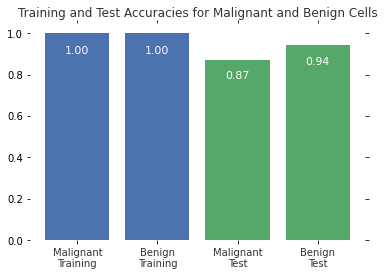

In [18]:
#Data Visualization

mal_train_X = X_train[y_train==0]
mal_train_y = y_train[y_train==0]
ben_train_X = X_train[y_train==1]
ben_train_y = y_train[y_train==1]

mal_test_X = X_test[y_test==0]
mal_test_y = y_test[y_test==0]
ben_test_X = X_test[y_test==1]
ben_test_y = y_test[y_test==1]

scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]

plt.figure()

# Plot the scores as a bar chart
bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

# directly label the score onto the bars
for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
        spine.set_visible(False)

plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)